# Regression Analysis

## Does crative features influence on Click Through Rate?

-- Cuáles son los drivers de performance en Paid Social (TikTok)?

In [1]:
import json
import os

# Data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries


## Pre-processing

Cleaning this thing up

In [379]:
#load json data and convert to pandas dataframe
def load_json_to_dataframe(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    return df

raw_data = load_json_to_dataframe('/Users/camilojaureguiberry/Documents/Projects/Developments/NarrativeLens/data/datasets/NarrativeLens.tiktok_ads_us_toplikes.json')



In [380]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                582 non-null    object 
 1   ad_title           582 non-null    object 
 2   brand_name         582 non-null    object 
 3   cost               582 non-null    int64  
 4   ctr                582 non-null    float64
 5   favorite           582 non-null    bool   
 6   id                 582 non-null    object 
 7   industry_key       582 non-null    object 
 8   is_search          582 non-null    bool   
 9   like               582 non-null    int64  
 10  objective_key      582 non-null    object 
 11  tag                221 non-null    float64
 12  video_info         582 non-null    object 
 13  detail_analysis    582 non-null    object 
 14  industry           582 non-null    object 
 15  objective          582 non-null    object 
 16  scrap_datetime     582 non

In [381]:
raw_data.head()

,_id,ad_title,brand_name,cost,ctr,favorite,id,industry_key,is_search,like,...,tag,video_info,detail_analysis,industry,objective,scrap_datetime,video_name,creative_features,is_ugc,ugc_explanation
0,{'$oid': '67f0473955c66f33e12973f2'},Great time killer!,Survival Game Master,2,0.01,False,7132878852058906625,label_23125000000,True,38213,...,3.0,"{'vid': 'v0911dg40001cbta3ebc77u7vbp6b1gg', 'd...",This ad is using Product Review to catch audie...,{'child': {'id': {'$numberLong': '23125000000'...,"{'id': 2, 'value': 'App Installs'}",2025-04-04T17:53:16.735723,ad_23000000000_2_0_1,{'creative_theme': 'Promotional & Offer-Based'...,True,Justification: This video qualifies as a UGC-s...
1,{'$oid': '67f0473955c66f33e12973f3'},Oddly satisfying game,Gameworld Master,2,0.01,False,7109275920046178305,label_23125000000,True,14299,...,3.0,"{'vid': 'v10033g50000caldhr3c77ub7mthrn5g', 'd...",This ad is using Strategy Focused to catch aud...,{'child': {'id': {'$numberLong': '23125000000'...,"{'id': 2, 'value': 'App Installs'}",2025-04-04T17:53:16.735723,ad_23000000000_2_1_1,"{'creative_theme': 'Product-Centric', 'creativ...",False,Justification: This video does not qualify as ...
2,{'$oid': '67f0473955c66f33e12973f4'},My friend recommended me to play this game,Sugarcane Inc. Empire Tycoon,0,0.02,False,7077499601561305089,label_23125000000,True,2427,...,NaN,"{'vid': 'v10033g50000cfgfgl3c77u9fehpnd8g', 'd...",,{'child': {'id': {'$numberLong': '23125000000'...,"{'id': 2, 'value': 'App Installs'}",2025-04-04T17:53:16.735723,ad_23000000000_2_2_1,"{'creative_theme': 'Educational & Explainer', ...",False,Justification: This video does not meet the UG...
3,{'$oid': '67f0473955c66f33e12973f5'},download now,"Smart VPN - Fast, Stable",2,0.02,False,7176836203668783106,label_23125000000,True,124771,...,3.0,"{'vid': 'v10033g50000cuqnqlnog65qepkj72vg', 'd...",This ad is using Oddly Satisfying to catch aud...,{'child': {'id': {'$numberLong': '23125000000'...,"{'id': 2, 'value': 'App Installs'}",2025-04-04T17:53:16.735723,ad_23000000000_2_3_1,"{'creative_theme': 'Lifestyle & Aspirational',...",False,Justification: This video does not qualify as ...
4,{'$oid': '67f0473955c66f33e12973f6'},Play ten minutes a day to relieve stress!,Sugarcane Factory 3D,0,0.02,False,7077499507373899777,label_23125000000,True,2739,...,NaN,"{'vid': 'v10033g50000cfl0uujc77u563dfii20', 'd...",,{'child': {'id': {'$numberLong': '23125000000'...,"{'id': 2, 'value': 'App Installs'}",2025-04-04T17:53:16.735723,ad_23000000000_2_4_1,"{'creative_theme': 'Product-Centric', 'creativ...",True,Justification: This video demonstrates the gam...


In [382]:
raw_data['cost'].value_counts()

cost
2    441
1    136
0      5
Name: count, dtype: int64

In [383]:
raw_data['objective'][0]

{'id': 2, 'value': 'App Installs'}

In [384]:
#Extracting features from nested json attributes

def extract_video_info(video_info):
    if isinstance(video_info, dict):
        return pd.Series({
            'duration': video_info.get('duration', None),
            'height': video_info.get('height', None), 
            'width': video_info.get('width', None),
        })
    return pd.Series()

def extract_industry_info(industry):
    if isinstance(industry, dict):
        return pd.Series({
            'industry_parent': industry.get('parent', {}).get('value'),
            'industry_child': industry.get('child', {}).get('value')
        })
    return pd.Series()

def extract_objective_info(objective):
    if isinstance(objective, dict):
        return pd.Series({
            'objective_value': objective.get('value')
        })
    return pd.Series()

def extract_creative_features(creative_features):
    if isinstance(creative_features, dict):
        return pd.Series({
            'creative_theme': creative_features.get('creative_theme', None),
            'creative_concept': creative_features.get('creative_concept', None),
            'format_production_style': creative_features.get('format_production_style', None),
            'talent_type': creative_features.get('talent_type', None),
            'demographic_representation': creative_features.get('demographic_representation', None),
            'audience_focus': creative_features.get('audience_focus', None),
            'campaign_objective': creative_features.get('campaign_objective', None)
        })
    return pd.Series()

In [385]:
# Extract features and create new columns
video_features = raw_data['video_info'].apply(extract_video_info)
raw_data = pd.concat([raw_data, video_features], axis=1)

industry_features = raw_data['industry'].apply(extract_industry_info)
raw_data = pd.concat([raw_data, industry_features], axis=1)

objective_features = raw_data['objective'].apply(extract_objective_info)    
raw_data = pd.concat([raw_data, objective_features], axis=1)

creative_features = raw_data['creative_features'].apply(extract_creative_features)
raw_data = pd.concat([raw_data, creative_features], axis=1)

In [386]:
#I will persist the detail analysis and ugc_explanaition in a separate dataset if I need it to come back to it
detail_ugc_analysis = raw_data[['id', 'detail_analysis', 'ugc_explanation']]
detail_ugc_analysis.to_csv('/Users/camilojaureguiberry/Documents/Projects/Developments/NarrativeLens/data/datasets/detail_ugc_analysis.csv', index=False)


In [387]:
#Do we have repeated ids?
print(raw_data['id'].value_counts().head(3))

#There are! Lets get rid of them and keep the first occurrence
raw_data = raw_data.drop_duplicates(subset=['id'], keep='first')

#Final Check
print(raw_data['id'].value_counts().head(3))

id
7033790587334098946    2
7061134395470790658    2
7052699606257254401    2
Name: count, dtype: int64
id
7132878852058906625    1
7270335845928124417    1
7380119227216789505    1
Name: count, dtype: int64


In [388]:
#Any null values?
print(raw_data.isnull().sum())

_id                             0
ad_title                        0
brand_name                      0
cost                            0
ctr                             0
favorite                        0
id                              0
industry_key                    0
is_search                       0
like                            0
objective_key                   0
tag                           360
video_info                      0
detail_analysis                 0
industry                        0
objective                       0
scrap_datetime                  0
video_name                      0
creative_features               0
is_ugc                          0
ugc_explanation                 0
duration                        0
height                          0
width                           0
industry_parent                 0
industry_child                  0
objective_value                 0
creative_theme                  0
creative_concept                0
format_product

In [389]:
#Drop raw columns
df = raw_data.drop(columns=['video_info', 'industry', 'tag', 'objective', 'video_name', '_id', 'favorite', 'is_search', 'scrap_datetime', 'creative_features', 'industry_key', 'objective_key', 'detail_analysis', 'ugc_explanation'])


In [390]:
df.dropna(inplace=True)

## EDA

Lets start getting some sense of this data

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ad_title                    578 non-null    object 
 1   brand_name                  578 non-null    object 
 2   cost                        578 non-null    int64  
 3   ctr                         578 non-null    float64
 4   id                          578 non-null    object 
 5   like                        578 non-null    int64  
 6   is_ugc                      578 non-null    bool   
 7   duration                    578 non-null    float64
 8   height                      578 non-null    float64
 9   width                       578 non-null    float64
 10  industry_parent             578 non-null    object 
 11  industry_child              578 non-null    object 
 12  objective_value             578 non-null    object 
 13  creative_theme              578 non-null

In [392]:
df.head()

,ad_title,brand_name,cost,ctr,id,like,is_ugc,duration,height,width,industry_parent,industry_child,objective_value,creative_theme,creative_concept,format_production_style,talent_type,demographic_representation,audience_focus,campaign_objective
0,Great time killer!,Survival Game Master,2,0.01,7132878852058906625,38213,True,30.974,1280.0,720.0,News & Entertainment,Games & Utility Software,App Installs,Promotional & Offer-Based,Product demo,Native Video,Influencers,Primarily Male,Unaware Audience,App Promotion
1,Oddly satisfying game,Gameworld Master,2,0.01,7109275920046178305,14299,False,37.334,1024.0,576.0,News & Entertainment,Games & Utility Software,App Installs,Product-Centric,Product demo,Native Video,None,No People Featured,Unaware Audience,Awareness
2,My friend recommended me to play this game,Sugarcane Inc. Empire Tycoon,0,0.02,7077499601561305089,2427,False,17.323,1024.0,576.0,News & Entertainment,Games & Utility Software,App Installs,Educational & Explainer,Product demo,Animation & Motion Graphics,None,No People Featured,Unaware Audience,Awareness
3,download now,"Smart VPN - Fast, Stable",2,0.02,7176836203668783106,124771,False,53.015,1280.0,720.0,News & Entertainment,Games & Utility Software,App Installs,Lifestyle & Aspirational,Before-and-after story,Animation & Motion Graphics,None,Primarily Female,Unclear,Engagement
4,Play ten minutes a day to relieve stress!,Sugarcane Factory 3D,0,0.02,7077499507373899777,2739,True,14.016,1024.0,576.0,News & Entertainment,Games & Utility Software,App Installs,Product-Centric,Product demo,Animation & Motion Graphics,None,No People Featured,Unaware Audience,App Promotion


In [393]:
#What are the brands in this dataset?
print(df['brand_name'].value_counts())

#There are several missing values in the brand_name and then is very sparse
#Lets drop it
df = df.drop(columns=['brand_name'])

brand_name
                                     129
Celebs News                           12
Bend: Stretching & Flexibility         9
Fabletics Men                          8
FableticsMen                           6
                                    ... 
Filter Design Online                   1
Vid-Game                               1
Online & Digital Marketing Degree      1
UX&UI&ME                               1
Survival Game Master                   1
Name: count, Length: 336, dtype: int64


In [394]:
#What is the distribution of the cost?
print(df['cost'].value_counts())

cost
2    438
1    135
0      5
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


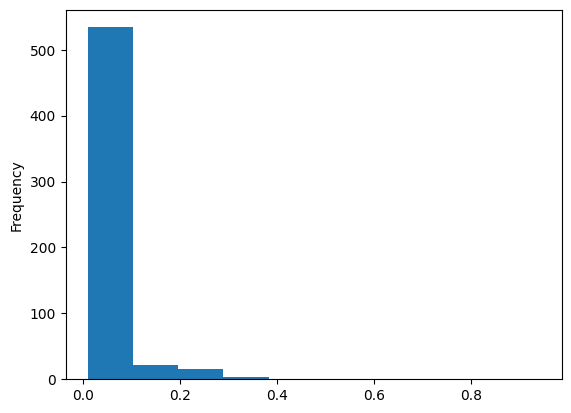

In [395]:
#Whats the distribution of CTR?
print(df['ctr'].plot.hist())
plt.show();

In [396]:
#Strong skew to the right, lets inspect the outliers with IQR method
Q1 = df['ctr'].quantile(0.25)
Q3 = df['ctr'].quantile(0.75)
IQR = Q3 - Q1

df.loc[df['ctr'] > Q3 + 1.5 * IQR]


,ad_title,cost,ctr,id,like,is_ugc,duration,height,width,industry_parent,industry_child,objective_value,creative_theme,creative_concept,format_production_style,talent_type,demographic_representation,audience_focus,campaign_objective
8,Be My Guest is the new trend,2,0.04,7188113660753313794,2445,True,13.014,1024.0,576.0,News & Entertainment,Other News & Entertainment,App Installs,Humor & Entertainment,Day-in-the-life story,Animation & Motion Graphics,None,No People Featured,Unclear,Unclear
9,Play now or Cry later,2,0.04,7169928916990312449,8503,False,30.016,1024.0,576.0,News & Entertainment,Other News & Entertainment,App Installs,Humor & Entertainment,Day-in-the-life story,Native Video,None,No People Featured,Unclear,App Promotion
10,We are here to support you friends! 🥰💕 #mental...,2,0.05,7183086453202550786,87258,True,18.597,1024.0,576.0,News & Entertainment,Games & Utility Software,App Installs,Lifestyle & Aspirational,Day-in-the-life story,Native Video,Customers,Primarily Female,Problem Aware,Engagement
11,This is really satisfying!,2,0.06,7176960976629104642,289737,False,30.016,1280.0,720.0,News & Entertainment,Games & Utility Software,App Installs,Product-Centric,Product demo,Native Video,None,No People Featured,Unclear,App Promotion
12,Check it out! We just released our NEW GAME!,1,0.07,7125421394594988034,2610,True,30.016,1024.0,576.0,News & Entertainment,Games & Utility Software,App Installs,Promotional & Offer-Based,Event-driven,Native Video,None,No People Featured,Product Aware,Engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,🧟‍♀️🖤💜💚 ZOMBIFIED 💚💜🖤🧟‍♀️ those NEON shades! ...,1,0.38,7157344090140180481,3720,True,26.307,1024.0,576.0,Beauty & Personal Care,Cosmetics,Product sales,Product-Centric,Product demo,Native Video,Actors,Diverse Gender Representation,Product Aware,Sales
575,Rev up your pet's playtime. The ultimate exerc...,2,0.08,7172740553150382081,3182,True,25.334,1024.0,576.0,Pets,Pet Toys,Product sales,Product-Centric,Product demo,Native Video,None,No People Featured,Problem Aware,Sales
579,You Sold These Out Last Time,2,0.13,7154668616717778946,7150,False,9.067,1024.0,576.0,Apparel & Accessories,Men's Clothing,Product sales,Product-Centric,Product demo,Native Video,None,No People Featured,Unclear,Sales
580,Vintage Inspired Fleeces! Buy yours.,2,0.14,7154671305471754241,4427,True,9.126,1024.0,576.0,Apparel & Accessories,Men's Clothing,Product sales,Product-Centric,Product demo,Native Video,None,No People Featured,Unclear,Awareness


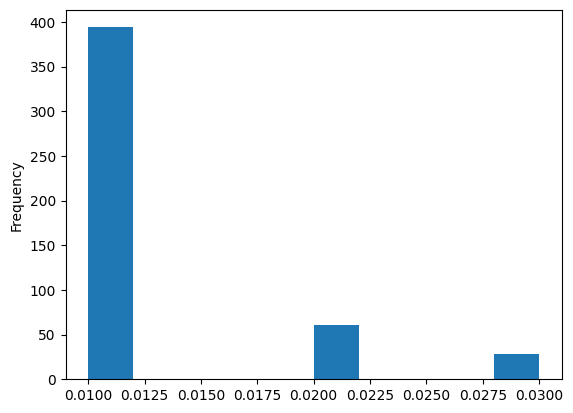

In [397]:
#now lets get rid of them
df = df[df['ctr'] < Q3 + 1.5 * IQR]

df['ctr'].plot.hist()
plt.show();

Axes(0.125,0.11;0.775x0.77)


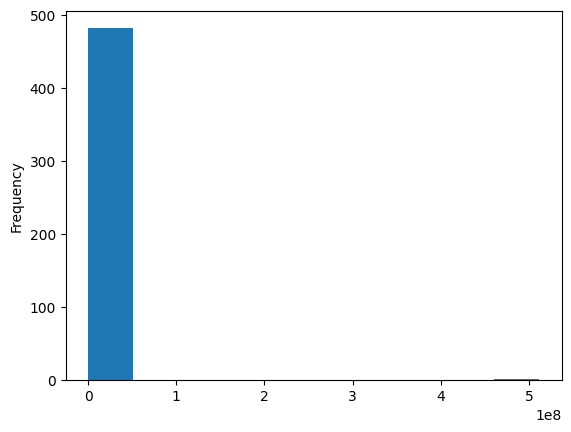

In [398]:
#What is the distribution of the likes?
print(df['like'].plot.hist())
plt.show();

In [399]:
#Looks there's a big outlier in the likes, lets inspect it using the IQR method
Q1 = df['like'].quantile(0.25)
Q3 = df['like'].quantile(0.75)
IQR = Q3 - Q1

df.loc[df['like'] > Q3 + 1.5 * IQR]

,ad_title,cost,ctr,id,like,is_ugc,duration,height,width,industry_parent,industry_child,objective_value,creative_theme,creative_concept,format_production_style,talent_type,demographic_representation,audience_focus,campaign_objective
0,Great time killer!,2,0.01,7132878852058906625,38213,True,30.974,1280.0,720.0,News & Entertainment,Games & Utility Software,App Installs,Promotional & Offer-Based,Product demo,Native Video,Influencers,Primarily Male,Unaware Audience,App Promotion
3,download now,2,0.02,7176836203668783106,124771,False,53.015,1280.0,720.0,News & Entertainment,Games & Utility Software,App Installs,Lifestyle & Aspirational,Before-and-after story,Animation & Motion Graphics,None,Primarily Female,Unclear,Engagement
36,Will they get 20 bucks?,2,0.03,7223381121831895041,359895,True,31.044,1024.0,576.0,Sports & Outdoor,Sports & Equipment,App Installs,Promotional & Offer-Based,Product demo,Native Video,Actors,Primarily Young Adults,Problem Aware,App Promotion
54,Expect anything to happen,1,0.01,7117952658766659586,93864,False,30.080,1024.0,576.0,Games,Hyper-Casual,App Installs,Humor & Entertainment,None,Native Video,None,No People Featured,Unclear,Engagement
66,Fold to Unfold,2,0.01,7052699606257254401,84616,False,22.251,1024.0,576.0,Games,Hyper-Casual,App Installs,Trend-Based & Reactive,Meme-based content,Animation & Motion Graphics,None,Primarily Young Adults,Product Aware,Engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,"Lulu quality activewear, without the hefty pri...",2,0.01,7223840205890650113,85280,True,39.680,1024.0,576.0,Apparel & Accessories,Men's Clothing,Conversions,Promotional & Offer-Based,Limited-time offer,Native Video,Customers,Primarily Male,Product Aware,Sales
515,Swipe Left To See If You're Qualified!!,2,0.01,7173269590617227265,41971,False,13.167,1024.0,576.0,Financial Services,Insurance,Conversions,Promotional & Offer-Based,Limited-time offer,Native Video,None,Unclear,Problem Aware,Leads
524,Swipe Left To Check Your Eligibility!,2,0.02,7169199628125241346,59168,True,13.307,1024.0,576.0,Financial Services,Insurance,Conversions,Promotional & Offer-Based,Limited-time offer,Native Video,None,Unclear,Problem Aware,Leads
556,"Free shipping & COD(available) ,RM 16.6/pc Onl...",2,0.02,7205252434469371906,79636,True,22.755,1024.0,576.0,Beauty & Personal Care,Oral Care,Product sales,Product-Centric,Before-and-after story,Native Video,Customers,Primarily Female,Problem Aware,Sales


<Axes: ylabel='Frequency'>

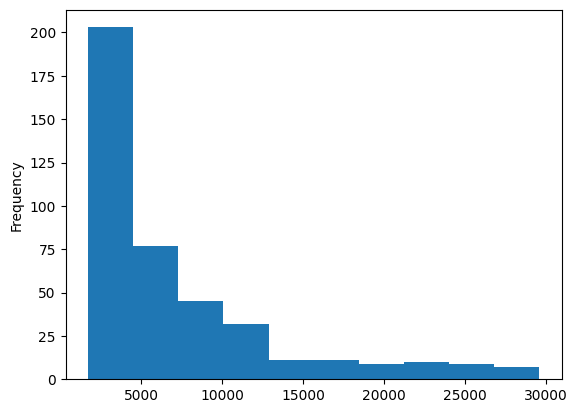

In [400]:
#Lets get rid of them
df = df[df['like'] < Q3 + 1.5 * IQR]

df['like'].plot.hist()

Axes(0.125,0.11;0.775x0.77)


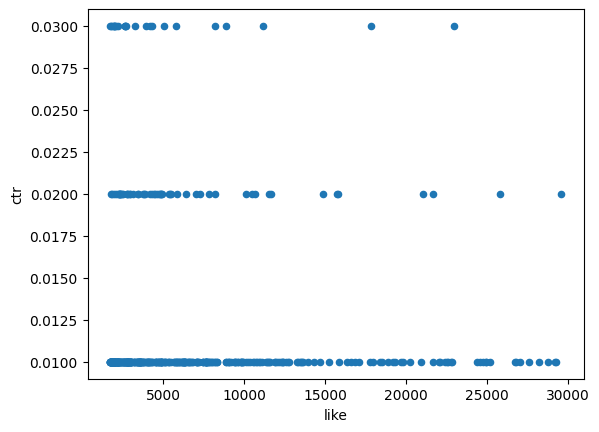

In [401]:
#Is any relationship between likes and CTR?
print(df.plot.scatter(x='like', y='ctr'))
plt.show();

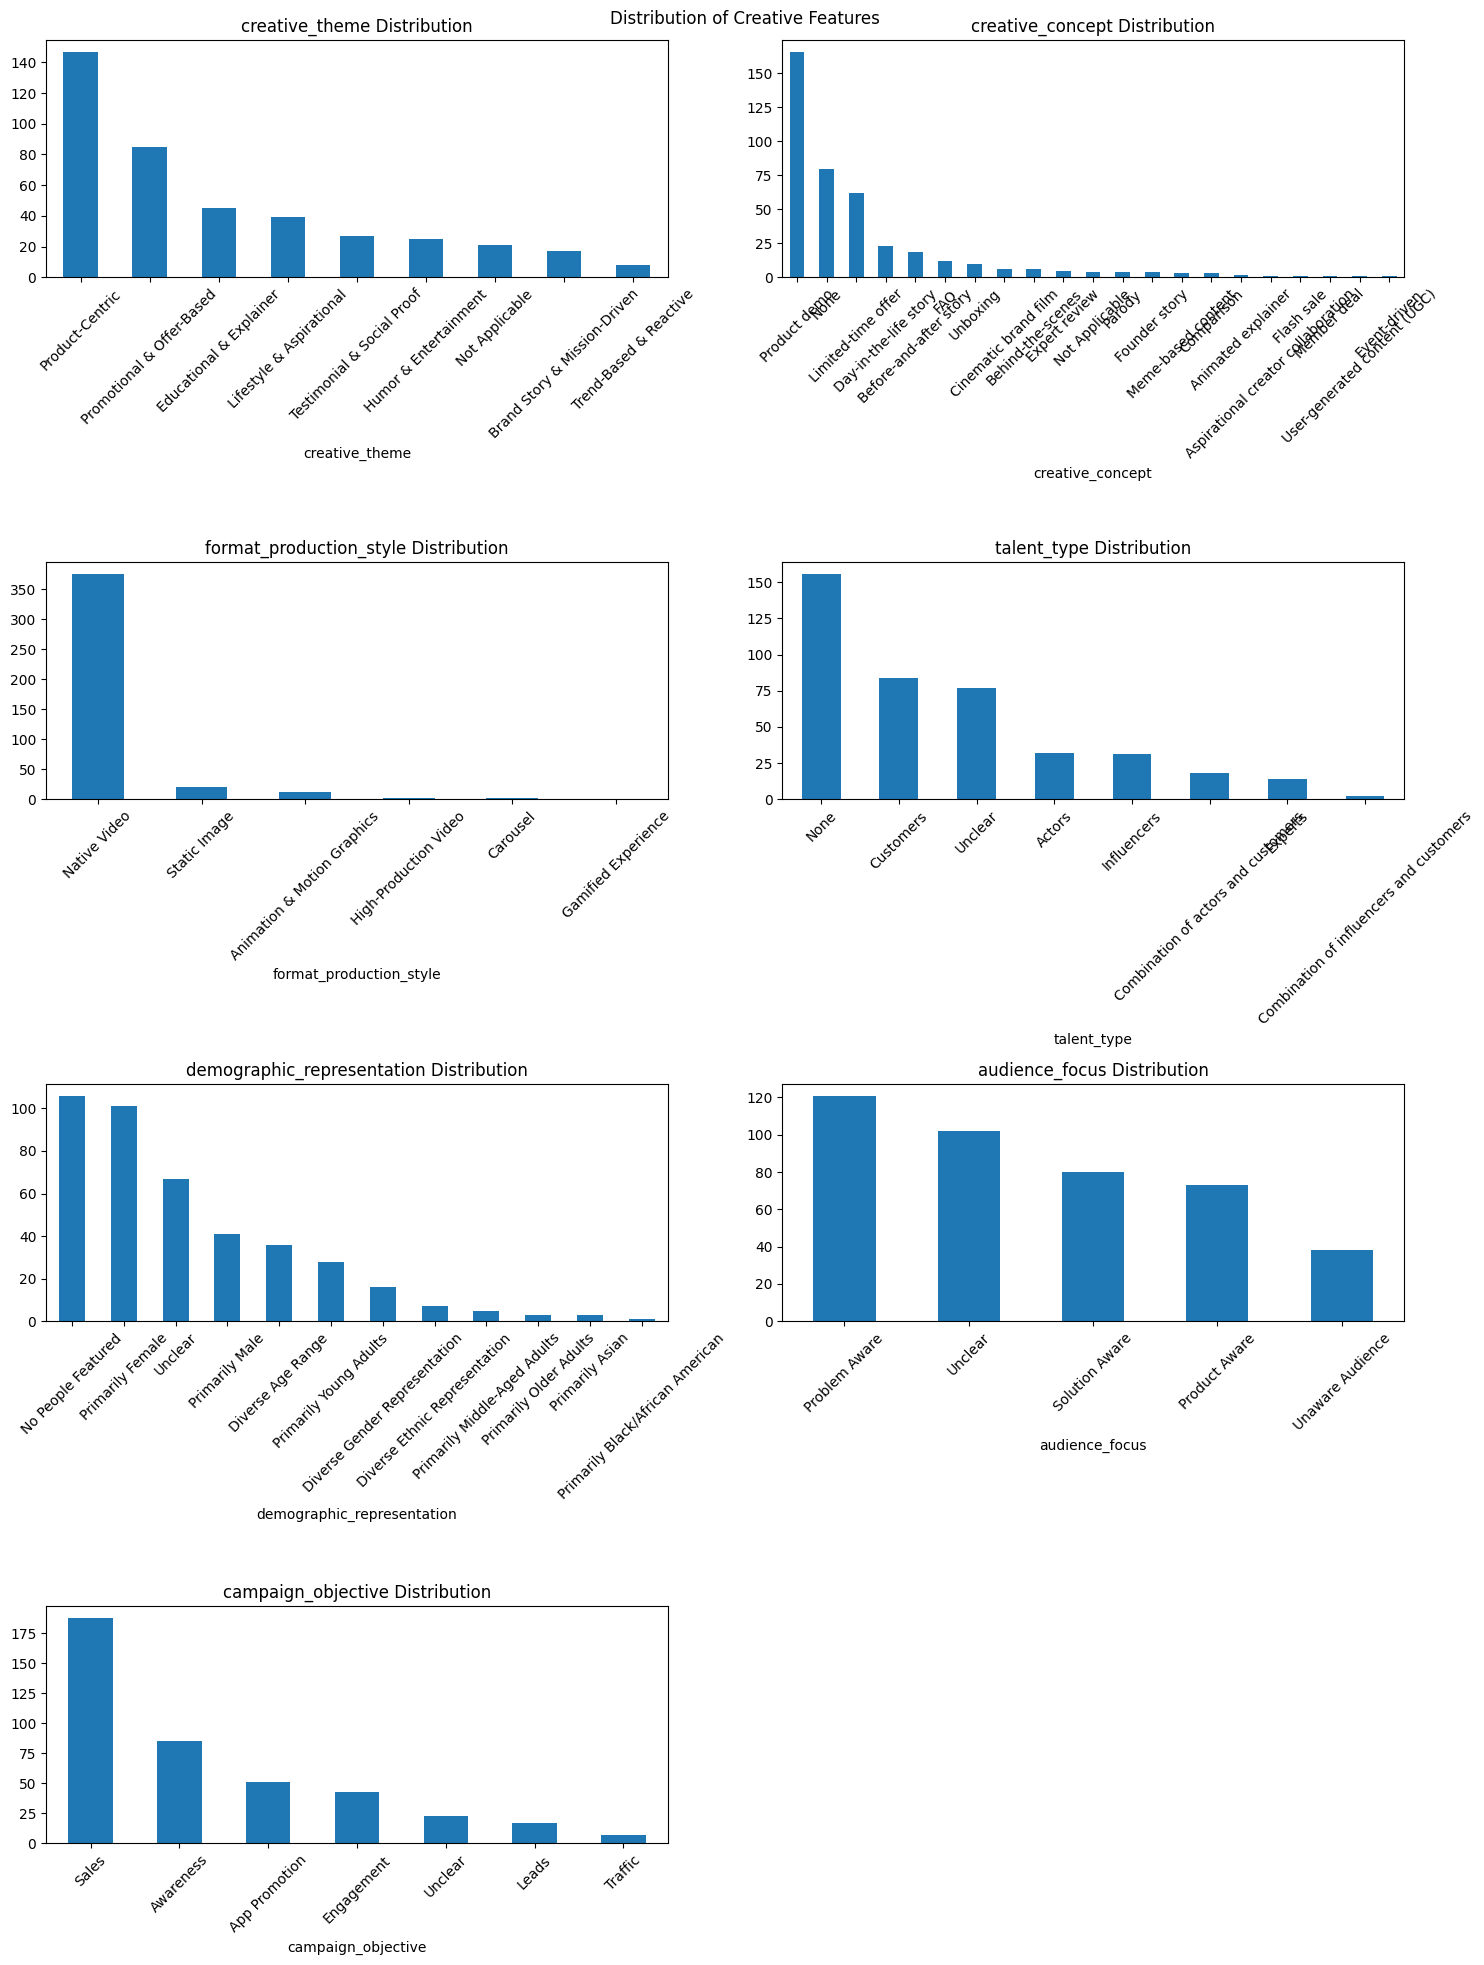

In [402]:
#to-do: we need to understand the cardinality of the creative features. Lets plot the value counts of each feature

# Create a figure with subplots in a grid
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution of Creative Features')

# Flatten axes array for easier iteration
axes = axes.flatten()

# Features to plot
features = ['creative_theme', 'creative_concept', 'format_production_style', 
           'talent_type', 'demographic_representation', 'audience_focus',
           'campaign_objective']

# Plot each feature
for i, feature in enumerate(features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45)
    
# Remove empty subplots if any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [403]:
#One way to reduce the cardinality of the creative features is to group them into a few categories given a pareto principle

#Lets group them into a few categories given a pareto principle
def pareto_grouping(series, threshold=0.8):
    """
    Groups categories in a series based on the Pareto principle.
    Categories that make up 80% of occurrences are kept, the rest are grouped as 'Others'.
    
    Args:
        series: pandas Series containing categorical data
        threshold: float, cumulative percentage threshold (default 0.8 for 80%)
    
    Returns:
        pandas Series with grouped categories
    """
    # Calculate value counts and cumulative percentages
    value_counts = series.value_counts()
    cum_percentages = value_counts.cumsum() / value_counts.sum()
    
    # Get categories that make up threshold% of occurrences
    major_categories = cum_percentages[cum_percentages <= threshold].index
    
    # Create new series with grouped categories
    return series.apply(lambda x: x if x in major_categories else 'Others')

# Apply pareto grouping to each creative feature
for feature in features:
    print(f"\n{feature} - Original value counts:")
    print(df[feature].value_counts())
    
    df[feature] = pareto_grouping(df[feature])
    
    print(f"\n{feature} - After pareto grouping:")
    print(df[feature].value_counts())



creative_theme - Original value counts:
creative_theme
Product-Centric                 147
Promotional & Offer-Based        85
Educational & Explainer          45
Lifestyle & Aspirational         39
Testimonial & Social Proof       27
Humor & Entertainment            25
Not Applicable                   21
Brand Story & Mission-Driven     17
Trend-Based & Reactive            8
Name: count, dtype: int64

creative_theme - After pareto grouping:
creative_theme
Product-Centric              147
Others                        98
Promotional & Offer-Based     85
Educational & Explainer       45
Lifestyle & Aspirational      39
Name: count, dtype: int64

creative_concept - Original value counts:
creative_concept
Product demo                          166
None                                   80
Limited-time offer                     62
Day-in-the-life story                  23
Before-and-after story                 19
FAQ                                    12
Unboxing                           

In [404]:
#Now, replace the original features with the grouped ones
df = df.drop(columns=features)
df = pd.concat([df, df[features]], axis=1)

#Lets see the value counts of each feature
for feature in features:
    print(df[feature].value_counts())

KeyError: "None of [Index(['creative_theme', 'creative_concept', 'format_production_style',\n       'talent_type', 'demographic_representation', 'audience_focus',\n       'campaign_objective'],\n      dtype='object')] are in the [columns]"

In [340]:
#Ok cool, now lets transform the text features into numerical features with one-hot encoding
df = pd.get_dummies(df, columns=['industry_parent', 'industry_child', 'objective_value', 'creative_theme', 'creative_concept', 'format_production_style', 'talent_type', 'demographic_representation', 'audience_focus', 'campaign_objective'])


In [341]:
#Print the dtypes
print(df.dtypes)

#Lets drop the id column
df = df.drop(columns=['id', 'ad_title'])

ad_title                          object
cost                               int64
ctr                              float64
id                                object
like                               int64
                                  ...   
campaign_objective_Engagement       bool
campaign_objective_Leads            bool
campaign_objective_Sales            bool
campaign_objective_Traffic          bool
campaign_objective_Unclear          bool
Length: 210, dtype: object


In [342]:
df.head()

,cost,ctr,like,is_ugc,duration,height,width,industry_parent_Apparel & Accessories,industry_parent_Appliances,industry_parent_Apps,...,audience_focus_Solution Aware,audience_focus_Unaware Audience,audience_focus_Unclear,campaign_objective_App Promotion,campaign_objective_Awareness,campaign_objective_Engagement,campaign_objective_Leads,campaign_objective_Sales,campaign_objective_Traffic,campaign_objective_Unclear
1,2,0.01,14299,False,37.334,1024.0,576.0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,0,0.02,2427,False,17.323,1024.0,576.0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,0,0.02,2739,True,14.016,1024.0,576.0,False,False,False,...,False,True,False,True,False,False,False,False,False,False
5,1,0.02,5491,True,19.318,1280.0,720.0,False,False,False,...,False,True,False,True,False,False,False,False,False,False
6,1,0.03,1811,True,25.250,1280.0,720.0,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [343]:
corr = df.corr()

#Lets find if there are any highly correlated features
#Get the upper triangle of the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

#Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.5)]
print(to_drop)

['industry_child_Auto Accessories', 'industry_child_Beauty & Personal Care', 'industry_child_Celebrities & Gossip', 'industry_child_Cell Phones', 'industry_child_Clothing Accessories', 'industry_child_Cosmetics', 'industry_child_Electric Scooters', 'industry_child_Food & Fresh Produce', 'industry_child_Furniture', 'industry_child_Higher Education', 'industry_child_Home Appliances', 'industry_child_Hyper-Casual', 'industry_child_Large E-commerce Platforms', 'industry_child_Loan Services', 'industry_child_Marketing & Advertising', 'industry_child_Medical Information', 'industry_child_Medical Services', "industry_child_Men's Clothing", 'industry_child_Non-academic Training (Hobbies)', 'industry_child_Non-alcoholic Beverages', 'industry_child_Other Baby, Kids & Maternity', 'industry_child_Pet Household Products', 'industry_child_Skincare', 'industry_child_Sports & Equipment', 'industry_child_Sports & Outdoor', 'industry_child_Tours & Attractions', 'industry_child_Travel Agencies & Services

## Train the linear regression

In [344]:
#lets see if there are any non numeric features
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='bool').columns)


Index([], dtype='object')
Index(['is_ugc', 'industry_parent_Apparel & Accessories',
       'industry_parent_Appliances', 'industry_parent_Apps',
       'industry_parent_Baby, Kids & Maternity',
       'industry_parent_Beauty & Personal Care',
       'industry_parent_Business Services',
       'industry_parent_E-Commerce (Non-app)', 'industry_parent_Education',
       'industry_parent_Financial Services',
       ...
       'audience_focus_Solution Aware', 'audience_focus_Unaware Audience',
       'audience_focus_Unclear', 'campaign_objective_App Promotion',
       'campaign_objective_Awareness', 'campaign_objective_Engagement',
       'campaign_objective_Leads', 'campaign_objective_Sales',
       'campaign_objective_Traffic', 'campaign_objective_Unclear'],
      dtype='object', length=202)


In [345]:
#I need to cast boolean features to int
df = df * 1

In [346]:
# Import statsmodels for linear regression
import statsmodels.api as sm

# Prepare X (features) and y (target)
y = df['ctr']
X = df.drop(['ctr', 'cost', 'like'], axis=1)

In [347]:
X.dtypes


is_ugc                                     int64
duration                                 float64
height                                   float64
width                                    float64
industry_parent_Apparel & Accessories      int64
                                          ...   
campaign_objective_Engagement              int64
campaign_objective_Leads                   int64
campaign_objective_Sales                   int64
campaign_objective_Traffic                 int64
campaign_objective_Unclear                 int64
Length: 205, dtype: object

In [348]:
# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4.376
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.13e-25
Time:                        17:14:30   Log-Likelihood:                 1864.3
No. Observations:                 414   AIC:                            -3377.
Df Residuals:                     238   BIC:                            -2668.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------